In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.pseudo_scalar_mediator import PseudoScalarMediator, PseudoScalarMFV
from hazma.parameters import neutral_pion_mass as mpi0
from hazma.parameters import up_quark_mass as muq
from hazma.parameters import down_quark_mass as mdq
from hazma.parameters import strange_quark_mass as msq
from hazma.parameters import electron_mass as me
from hazma.parameters import muon_mass as mmu
from hazma.parameters import b0, fpi, vh
from hazma.constraint_parameters import sv_inv_MeV_to_cm3_per_s

from utilities import get_color, get_tex_label, latex_text_width_1col

Check that mixing angle and $\pi^0$ mass shift are small for benchmark parameters:

In [2]:
# Lepton-specific/type III 2HDM couplings
gpuu = 1.
gpdd = -1.
gpll = 0.

psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1.,
                      gpup=gpuu, gpdown=gpdd, gpll=gpll)

print "beta = ", psm.beta
print "mpi0, mpi0 (shifted) = ", mpi0, psm.mpi0

beta =  4.65710475383e-06
mpi0, mpi0 (shifted) =  134.9766 134.97659992112156


Tiny cross section at benchmark point...

In [3]:
vx = 1.0e-3
e_cm = 2.*psm.mx*(1.+0.5*vx**2)

print psm.cross_sections(e_cm)["total"] * vx * sv_inv_MeV_to_cm3_per_s, "cm^3 / s"

2.733240720275421e-32 cm^3 / s


## Branching fractions as a function of $m_\chi$

The couplings below are the benchmark type III/lepton-specific 2HDM ones. For other 2HDMs, the couplings obey the relationships

* Type I: $g_{Pu} = -g_{Pd} = g_{P\ell}$
* Type II (MSSM-liked): $g_{Pu} = 1$, $g_{Pd} = g_{P\ell} = 0$
* Flipped/type Y: $g_{Pu} = g_{P\ell}$, $g_{Pd} = 0$,

where I set the coupling to leptons to zero when possible.

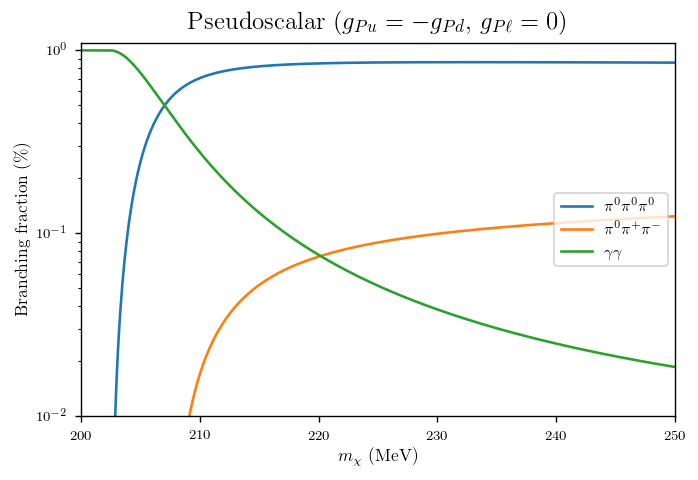

In [5]:
mx_min, mx_max, n_mxs = 200., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

# Lepton-specific/type III 2HDM couplings
gpuu = 1.
gpdd = -1.
gpll = 0.

psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1.,
                      gpup=gpuu, gpdown=gpdd, gpll=gpll)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    psm.mx = mx
    e_cm = 2. * psm.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(psm.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in psm.list_final_states()}

### Make the plot
plt.figure(figsize=(latex_text_width_1col, 4))

for fs, bf_list in bfs.iteritems():
    if fs in ["g g", "pi0 pi0 pi0", "pi0 pi pi"]:
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

plt.title("DM annihilation, pseudoscalar mediator")
plt.title("Pseudoscalar ($g_{Pu} = -g_{Pd}$, $g_{P\ell} = 0$)")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel("Branching fraction (\%)")
plt.legend(loc="center right")
plt.yscale("log")
plt.xlim(mxs[[0, -1]])
plt.ylim(1e-2, 1.1)

plt.tight_layout()
plt.savefig("figures/pseudoscalar_branching_fractions_mfv.pdf")